# Face Mask Detection Using Mobilenet
## Objective : `The objective of this project is to develop a face mask detection neural network model that can be used to detect whether a person is wearing a face mask or not. The model should be able to detect face masks in real-time and should be able to work in different lighting conditions.`


## About Dataset

This dataset is used for Face Mask Detection Classification with images. The dataset consists of almost 10K images.


## Installing Required Libraries

In [1]:
!pip install visualkeras opendatasets -q

     |████████████████████████████████| 989 kB 40.3 MB/s 


## Import Packages

In [2]:
import numpy as np
import pandas as pd
import glob
import random
import shutil
import os
import opendatasets as od
from tqdm import tqdm
from PIL import Image

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib
import matplotlib.pyplot as plt
import visualkeras
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Downloading dataset using opendataset from kaggle

In [5]:
url = "https://www.kaggle.com/datasets/muhammadahsan026/facemask-dataset-covid1910k-images-2-folders"

In [6]:
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omjiverma
Your Kaggle Key: ··········


100%|██████████| 337M/337M [00:09<00:00, 35.7MB/s]


## Data Exploration

In [11]:
dataset = "./facemask-dataset-covid1910k-images-2-folders/FaceMask-Dataset-covid-19"

In [12]:
os.listdir(dataset)

['with_mask', 'without_mask']

There are three directeries in the dataset

### Random images from dataset

In [21]:
def show_grid(dir_path):
  imgs_paths = glob.glob(dir_path+'/*/*.png')
  rand_imgs = random.choices(imgs_paths, k=30)
  plt.figure(figsize=(20,6))
  for i, img in enumerate(rand_imgs, start=1):
    plt.subplot(3, 10, i)
    image = Image.open(img)
    w, h = image.size
    image = image.resize((150,150))
    plt.imshow(image)
    plt.title(f'{w}x{h}')
    plt.axis('off')

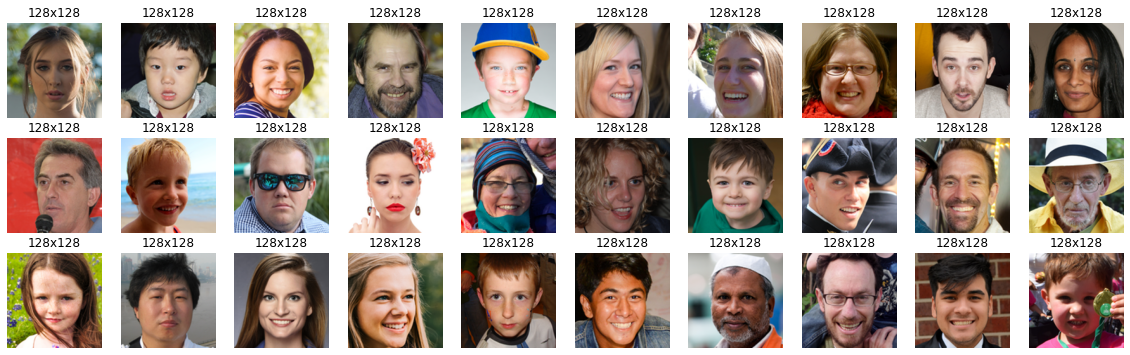

In [22]:
show_grid(dataset)

## Data Preprocessing

In [23]:
datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40,
      width_shift_range=0.2,height_shift_range=0.2,
      shear_range=0.2,zoom_range=0.2,horizontal_flip=True,
      vertical_flip=True,validation_split=0.2)

In [24]:
train_gen = datagen.flow_from_directory(directory = dataset,                                             
                                             target_size=(100,100),
                                             class_mode='binary',
                                             batch_size=40,
                                             subset='training',
                                             seed=7)

val_gen = datagen.flow_from_directory(directory = dataset,                                            
                                             target_size=(100,100),
                                             class_mode='binary',
                                             batch_size=50,
                                             subset='validation',
                                             seed=7)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [25]:
train_gen.class_indices

{'with_mask': 0, 'without_mask': 1}

In [26]:
val_gen.class_indices

{'with_mask': 0, 'without_mask': 1}

## Constructing Model using Mobilenetnet

### Loading Mobilenet model

In [27]:
mobnet = tf.keras.applications.MobileNet(weights=None, include_top=False,input_shape = (100,100,3))

In [28]:
model = Sequential()
model.add(mobnet)
model.add(Flatten())
model.add(Dense(1000,activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

### Compiling Model

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'],)

### Training Model

In [30]:
with tf.device(tf.DeviceSpec(device_type="GPU", device_index=1)):
  history = model.fit(train_gen,validation_data=val_gen,epochs=10,workers=4,use_multiprocessing=True)

Epoch 1/10
200/200 [==============================] - 59s 229ms/step - loss: 0.7224 - accuracy: 0.7554 - val_loss: 0.9040 - val_accuracy: 0.5000
Epoch 2/10
200/200 [==============================] - 50s 245ms/step - loss: 0.3077 - accuracy: 0.8749 - val_loss: 0.9114 - val_accuracy: 0.5000
Epoch 3/10
200/200 [==============================] - 48s 233ms/step - loss: 0.2722 - accuracy: 0.8965 - val_loss: 0.8531 - val_accuracy: 0.5025
Epoch 4/10
200/200 [==============================] - 47s 232ms/step - loss: 0.2322 - accuracy: 0.9141 - val_loss: 0.3461 - val_accuracy: 0.8730
Epoch 5/10
200/200 [==============================] - 49s 239ms/step - loss: 0.2049 - accuracy: 0.9233 - val_loss: 0.4978 - val_accuracy: 0.8120
Epoch 6/10
200/200 [==============================] - 47s 230ms/step - loss: 0.1943 - accuracy: 0.9270 - val_loss: 0.3036 - val_accuracy: 0.8915
Epoch 7/10
200/200 [==============================] - 47s 231ms/step - loss: 0.1800 - accuracy: 0.9348 - val_loss: 0.6619 - val_ac

In [31]:
with tf.device(tf.DeviceSpec(device_type="GPU", device_index=1)):
  history = model.fit(train_gen,validation_data=val_gen,epochs=5,workers=4,use_multiprocessing=True)

Epoch 1/5
200/200 [==============================] - 47s 231ms/step - loss: 0.1467 - accuracy: 0.9448 - val_loss: 0.4689 - val_accuracy: 0.8415
Epoch 2/5
200/200 [==============================] - 47s 225ms/step - loss: 0.1372 - accuracy: 0.9489 - val_loss: 0.4009 - val_accuracy: 0.8680
Epoch 3/5
200/200 [==============================] - 47s 228ms/step - loss: 0.1335 - accuracy: 0.9515 - val_loss: 0.2862 - val_accuracy: 0.8890
Epoch 4/5
200/200 [==============================] - 57s 279ms/step - loss: 0.1346 - accuracy: 0.9521 - val_loss: 0.4965 - val_accuracy: 0.8410
Epoch 5/5
200/200 [==============================] - 46s 227ms/step - loss: 0.1211 - accuracy: 0.9535 - val_loss: 0.1549 - val_accuracy: 0.9495


## Model Evaluation

In [36]:
model.evaluate(val_gen)

40/40 [==============================] - 11s 282ms/step - loss: 0.1459 - accuracy: 0.9430


[0.14590111374855042, 0.9430000185966492]

Model accuracy on validation data : 0.94

## Saving Trained Model

In [37]:
model.save("MaskDecetion-Mobnet.h5")

## Deploying Model Using Gradio

In [38]:
!pip install gradio -q

     |████████████████████████████████| 5.3 MB 35.2 MB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 
     |████████████████████████████████| 270 kB 72.8 MB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 112 kB 63.9 MB/s 
     |████████████████████████████████| 2.3 MB 55.5 MB/s 
     |████████████████████████████████| 212 kB 60.5 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 80 kB 8.6 MB/s 
     |████████████████████████████████| 68 kB 5.3 MB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |████████████████████████████████| 593 kB 68.2 MB/s 
     |████████████████████████████████| 4.0 MB 54.1 MB/s 
     |████████████████████████████████| 856 kB 65.2 MB/s 


In [40]:
from tensorflow.keras.utils import img_to_array
import gradio as gr

In [47]:
def pred_img(img): 
  test_image = img_to_array(img)
  img_rescale = img_to_array(img)/255
  img_expand = np.expand_dims(img_rescale, axis = 0)
  pred_proba = model.predict(img_expand)
  result = "Person With Mask" if (pred_proba < 0.5) else "Person Without Mask"
  return result

In [49]:
gui = gr.Interface(pred_img, gr.Image(shape=(100, 100)), outputs="text",title='Face Mask Detector')
gui.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://83dc3e92140ac32e.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7fe7b03b3750>,
 'http://127.0.0.1:7862/',
 'https://83dc3e92140ac32e.gradio.app')